## Summary

### Import libraries

In [1]:
import pandas as pd 
import numpy as np
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from IPython.display import IFrame

import os

In [2]:
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',1500)

In [3]:
spray_path = './Data/spray.csv'
weather_path = './Data/weather_cleaned.csv'
train_path = './Data/train_cleaned.csv'
test_path = './Data/test_cleaned.csv'


In [4]:
spray = pd.read_csv(spray_path)
weather = pd.read_csv(weather_path)
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [5]:
spray['year'] = spray['Date'].str.split('-')

In [6]:
spray['year'] = [y[0] for y in spray['year']]

In [7]:
spray['year'].value_counts()

2013    12626
2011     2209
Name: year, dtype: int64

In [8]:
spray.tail()

,Date,Time,Latitude,Longitude,year
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355,2013
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015,2013
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392,2013
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423,2013
14834,2013-09-05,8:35:41 PM,42.004805,-87.817460,2013


### Get Spray Dates

In [9]:
spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [10]:
d1=spray[spray['Date']=='2013-08-15']
d2=spray[spray['Date']=='2013-08-29']
d3=spray[spray['Date']=='2013-07-17']
d4=spray[spray['Date']=='2011-09-07']
d5=spray[spray['Date']=='2013-07-25']
d6=spray[spray['Date']=='2013-08-22']
d7=spray[spray['Date']=='2013-08-08']
d8=spray[spray['Date']=='2013-09-05']
d9=spray[spray['Date']=='2013-08-16']

In [11]:
spray.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


In [12]:
weather.head()

,index,station,date,tavg,preciptotal,sealevel,resultspeed,resultdir,rel_hum,latitude,longitude
0,0,1,2007-05-01,67.0,0.0,29.82,1.7,27,57.039444,41.995,-87.933
1,1,2,2007-05-01,68.0,0.0,29.82,2.7,25,55.134977,41.786,-87.752
2,2,1,2007-05-02,51.0,0.0,30.09,13.0,4,71.781719,41.995,-87.933
3,3,2,2007-05-02,52.0,0.0,30.08,13.3,2,69.235378,41.786,-87.752
4,4,1,2007-05-03,56.0,0.0,30.12,11.7,7,55.653432,41.995,-87.933


In [13]:
weather.shape

(2919, 11)

In [14]:
2944/2

1472.0

In [15]:
weather.isnull().sum()

index          0
station        0
date           0
tavg           0
preciptotal    0
sealevel       0
resultspeed    0
resultdir      0
rel_hum        0
latitude       0
longitude      0
dtype: int64

### Get Day, Month, Year From Date

In [16]:
weather['year'] = weather['date'].str.split('-')

In [17]:
train.head()

,date,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day,tot_mos_species,species_PIPIENS,species_PIPIENS/RESTUANS,species_RESTUANS
0,2007-05-29,T002,41.954690,-87.800991,1,0,2007,5,29,1,0,1,0
1,2007-05-29,T002,41.954690,-87.800991,1,0,2007,5,29,1,0,0,1
2,2007-05-29,T007,41.994991,-87.769279,1,0,2007,5,29,1,0,0,1
3,2007-05-29,T015,41.974089,-87.824812,1,0,2007,5,29,1,0,1,0
4,2007-05-29,T015,41.974089,-87.824812,4,0,2007,5,29,4,0,0,1


In [18]:
train['year_split'] = train['date'].str.split('-')
train['year_split']

0       [2007, 05, 29]
1       [2007, 05, 29]
2       [2007, 05, 29]
3       [2007, 05, 29]
4       [2007, 05, 29]
             ...      
8591    [2013, 09, 26]
8592    [2013, 09, 26]
8593    [2013, 09, 26]
8594    [2013, 09, 26]
8595    [2013, 09, 26]
Name: year_split, Length: 8596, dtype: object

In [19]:
train['year'] = [y[0] for y in train['year_split']]
train['year']

0       2007
1       2007
2       2007
3       2007
4       2007
        ... 
8591    2013
8592    2013
8593    2013
8594    2013
8595    2013
Name: year, Length: 8596, dtype: object

In [20]:
train['month'] = [y[1] for y in train['year_split']]
train['month']

0       05
1       05
2       05
3       05
4       05
        ..
8591    09
8592    09
8593    09
8594    09
8595    09
Name: month, Length: 8596, dtype: object

In [21]:
train['day'] = [y[2] for y in train['year_split']]
train['day']

0       29
1       29
2       29
3       29
4       29
        ..
8591    26
8592    26
8593    26
8594    26
8595    26
Name: day, Length: 8596, dtype: object

In [22]:
train.head()

,date,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day,tot_mos_species,species_PIPIENS,species_PIPIENS/RESTUANS,species_RESTUANS,year_split
0,2007-05-29,T002,41.954690,-87.800991,1,0,2007,05,29,1,0,1,0,"[2007, 05, 29]"
1,2007-05-29,T002,41.954690,-87.800991,1,0,2007,05,29,1,0,0,1,"[2007, 05, 29]"
2,2007-05-29,T007,41.994991,-87.769279,1,0,2007,05,29,1,0,0,1,"[2007, 05, 29]"
3,2007-05-29,T015,41.974089,-87.824812,1,0,2007,05,29,1,0,1,0,"[2007, 05, 29]"
4,2007-05-29,T015,41.974089,-87.824812,4,0,2007,05,29,4,0,0,1,"[2007, 05, 29]"


In [23]:
train['year'].value_counts()

2007    2827
2013    2058
2009    1920
2011    1791
Name: year, dtype: int64

In [24]:
train.shape

(8596, 14)

### Get Weather Station Latitude and Longitude

In [25]:
lat=[]
lon=[]
for i in range(len(weather['station'])):
    if weather['station'][i]==1:
        lat.append(41.995)
        lon.append(-87.933)
    else:
        lat.append(41.786)
        lon.append(-87.752)
#Midpoint=41.8905
weather['latitude']=lat
weather['longitude']=lon

In [26]:
weather.head()

,index,station,date,tavg,preciptotal,sealevel,resultspeed,resultdir,rel_hum,latitude,longitude,year
0,0,1,2007-05-01,67.0,0.0,29.82,1.7,27,57.039444,41.995,-87.933,"[2007, 05, 01]"
1,1,2,2007-05-01,68.0,0.0,29.82,2.7,25,55.134977,41.786,-87.752,"[2007, 05, 01]"
2,2,1,2007-05-02,51.0,0.0,30.09,13.0,4,71.781719,41.995,-87.933,"[2007, 05, 02]"
3,3,2,2007-05-02,52.0,0.0,30.08,13.3,2,69.235378,41.786,-87.752,"[2007, 05, 02]"
4,4,1,2007-05-03,56.0,0.0,30.12,11.7,7,55.653432,41.995,-87.933,"[2007, 05, 03]"


In [27]:
train2007=train[train['year']=='2007']
train2009=train[train['year']=='2009']
train2011=train[train['year']=='2011']
train2013=train[train['year']=='2013']

In [28]:
train[(train['year']=='2007')]['day'].value_counts().sort_index()

01    281
02    156
03      2
04    269
05    119
06     24
07    179
08     17
09     38
11    139
12    126
15    238
16      9
17     24
18    209
19    127
21    181
22     68
24    334
25     31
26     69
27     82
28     34
29     71
Name: day, dtype: int64

### Get Train Data by Year, Month & Week

In [29]:
train2011_w3_aug=train[(train['year']=='2011')&(train['month']=='08')&((train['day'].astype(int)>=14) & (train['day'].astype(int)<=20))]
train2011_w4_aug=train[(train['year']=='2011')&(train['month']=='08')&((train['day'].astype(int)>=21) & (train['day'].astype(int)<=31))]
train2011_w1_sep=train[(train['year']=='2011')&(train['month']=='09')&((train['day'].astype(int)>=1) & (train['day'].astype(int)<=7))]
train2011_w2_sep=train[(train['year']=='2011')&(train['month']=='09')&((train['day'].astype(int)>=8) & (train['day'].astype(int)<=14))]
train2011_w3_sep=train[(train['year']=='2011')&(train['month']=='09')&((train['day'].astype(int)>=15) & (train['day'].astype(int)<=20))]
########

train2013_w2_jul=train[(train['year']=='2013')&(train['month']=='07')&((train['day'].astype(int)>=8) & (train['day'].astype(int)<=14))]
train2013_w3_jul=train[(train['year']=='2013')&(train['month']=='07')&((train['day'].astype(int)>=15) & (train['day'].astype(int)<=20))]
train2013_w4_jul=train[(train['year']=='2013')&(train['month']=='07')&((train['day'].astype(int)>=21) & (train['day'].astype(int)<=31))]

train2013_w1_aug=train[(train['year']=='2013')&(train['month']=='08')&((train['day'].astype(int)>=1) & (train['day'].astype(int)<=7))]
train2013_w2_aug=train[(train['year']=='2013')&(train['month']=='08')&((train['day'].astype(int)>=8) & (train['day'].astype(int)<=14))]
train2013_w3_aug=train[(train['year']=='2013')&(train['month']=='08')&((train['day'].astype(int)>=15) & (train['day'].astype(int)<=20))]
train2013_w4_aug=train[(train['year']=='2013')&(train['month']=='08')&((train['day'].astype(int)>=21) & (train['day'].astype(int)<=31))]

train2013_w1_sep=train[(train['year']=='2013')&(train['month']=='09')&((train['day'].astype(int)>=1) & (train['day'].astype(int)<=7))]
train2013_w2_sep=train[(train['year']=='2013')&(train['month']=='09')&((train['day'].astype(int)>=8) & (train['day'].astype(int)<=14))]

In [30]:
train2013_w3_jul

,date,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day,tot_mos_species,species_PIPIENS,species_PIPIENS/RESTUANS,species_RESTUANS,year_split
7149,2013-07-19,T002,41.954690,-87.800991,34,0,2013,07,19,34,0,0,1,"[2013, 07, 19]"
7150,2013-07-19,T046,41.891118,-87.654491,4,0,2013,07,19,4,0,1,0,"[2013, 07, 19]"
7151,2013-07-19,T046,41.891118,-87.654491,1,0,2013,07,19,1,0,0,1,"[2013, 07, 19]"
7152,2013-07-19,T048,41.867108,-87.654224,37,1,2013,07,19,37,0,1,0,"[2013, 07, 19]"
7153,2013-07-19,T048,41.867108,-87.654224,48,0,2013,07,19,48,0,0,1,"[2013, 07, 19]"
7154,2013-07-19,T049,41.896282,-87.655232,2,0,2013,07,19,2,0,1,0,"[2013, 07, 19]"
7155,2013-07-19,T054,41.921965,-87.632085,15,0,2013,07,19,30,0,1,0,"[2013, 07, 19]"
7156,2013-07-19,T054,41.921965,-87.632085,9,0,2013,07,19,9,0,0,1,"[2013, 07, 19]"
7157,2013-07-19,T094,41.720848,-87.666014,16,0,2013,07,19,16,0,1,0,"[2013, 07, 19]"
7158,2013-07-19,T094,41.720848,-87.666014,13,0,2013,07,19,13,0,0,1,"[2013, 07, 19]"


### Visualise Number of Mosquitoes by Month and Year

In [31]:
b1=train[(train['month']=='05') & (train['nummosquitos']==1)]['nummosquitos'].sum()

In [32]:
b2=train[(train['month']=='06') & (train['nummosquitos']==1)]['nummosquitos'].sum()

In [33]:
b3=train[(train['month']=='07') & (train['nummosquitos']==1)]['nummosquitos'].sum()

In [34]:
b4=train[(train['month']=='08') & (train['nummosquitos']==1)]['nummosquitos'].sum()

In [35]:
b5=train[(train['month']=='09') & (train['nummosquitos']==1)]['nummosquitos'].sum()

In [36]:
b6=train[(train['month']=='10') & (train['nummosquitos']==1)]['nummosquitos'].sum()

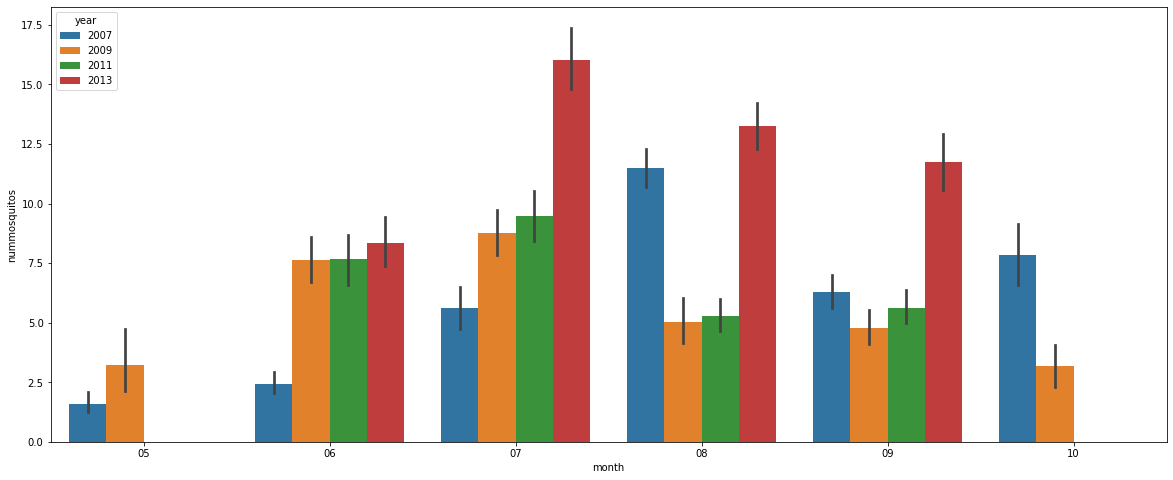

In [37]:

plt.figure(figsize=(20, 8))
ax_part = sns.barplot(x=train['month'],y='nummosquitos',hue='year',data=train)
plt.rcParams["axes.labelsize"] = 25
plt.show()

### Visualise Map with Folium Library

In [38]:
lat=41.923738
lon=-87.785288

wnv2011=folium.Map(location=[lat, lon],zoom_start=10)
wnv2013=folium.Map(location=[lat, lon],zoom_start=10)

In [39]:
fg2011 = folium.plugins.MarkerCluster(control=False)
wnv2011.add_child(fg2011)

fg2013 = folium.plugins.MarkerCluster(control=False)
wnv2013.add_child(fg2013)

w3aug2011 = plugins.FeatureGroupSubGroup(fg2011, 'Week 3 August 2011')
wnv2011.add_child(w3aug2011)

w4aug2011 = plugins.FeatureGroupSubGroup(fg2011, 'Week 4 August 2011')
wnv2011.add_child(w4aug2011)

w1sep2011 = plugins.FeatureGroupSubGroup(fg2011, 'Week 1 September 2011')
wnv2011.add_child(w1sep2011)

w2sep2011 = plugins.FeatureGroupSubGroup(fg2011, 'Week 2 September 2011')
wnv2011.add_child(w2sep2011)

w3sep2011 = plugins.FeatureGroupSubGroup(fg2011, 'Week 3 September 2011')
wnv2011.add_child(w3sep2011)

######################

w2jul2013 = plugins.FeatureGroupSubGroup(fg2013, 'Week 2 July 2013')
wnv2013.add_child(w2jul2013)

w3jul2013 = plugins.FeatureGroupSubGroup(fg2013, 'Week 3 July 2013')
wnv2013.add_child(w3jul2013)

w4jul2013 = plugins.FeatureGroupSubGroup(fg2013, 'Week 4 July 2013')
wnv2013.add_child(w4jul2013)

w1aug2013 = plugins.FeatureGroupSubGroup(fg2013, 'Week 1 August 2013')
wnv2013.add_child(w1aug2013)

w2aug2013 = plugins.FeatureGroupSubGroup(fg2013, 'Week 2 August 2013')
wnv2013.add_child(w2aug2013)

w3aug2013 = plugins.FeatureGroupSubGroup(fg2013, 'Week 3 August 2013')
wnv2013.add_child(w3aug2013)

w4aug2013 = plugins.FeatureGroupSubGroup(fg2013, 'Week 4 August 2013')
wnv2013.add_child(w4aug2013)

w1sep2013 = plugins.FeatureGroupSubGroup(fg2013, 'Week 1 September 2013')
wnv2013.add_child(w1sep2013)

w2sep2013 = plugins.FeatureGroupSubGroup(fg2013, 'Week 2 September 2013')
wnv2013.add_child(w2sep2013)

In [40]:
station1=[41.995,-87.933]
station2=[41.786,-87.752]

folium.Marker([station1[0], station1[1]], popup='<i>Station 1</i>').add_to(wnv2011)
folium.Marker([station2[0], station2[1]], popup='<i>Station 2</i>').add_to(wnv2011)

folium.Marker([station1[0], station1[1]], popup='<i>Station 1</i>').add_to(wnv2013)
folium.Marker([station2[0], station2[1]], popup='<i>Station 2</i>').add_to(wnv2013)




## Spray Markers

In [41]:

for date,lat, lon in zip(d1['Date'],d1['Latitude'], d1['Longitude']):
    popup_text = "Date",date
    folium.CircleMarker(
        [round(lat,6), round(lon,6)],
        radius=.01,
        color='#23f90e',
        fill_color='#23f90e',
        popup=popup_text,
        fill=True,
        fill_opacity=0.7
        ).add_to(w2aug2013)
for date,lat, lon in zip(d2['Date'],d2['Latitude'], d2['Longitude']):
    popup_text = "Date",date
    folium.CircleMarker(
        [round(lat,6), round(lon,6)],
        radius=.01,
        color='#edbabc',
        fill_color='#edbabc',
        popup=popup_text,
        fill=True,
        fill_opacity=0.7
        ).add_to(w3aug2013)
for date,lat, lon in zip(d3['Date'],d3['Latitude'], d3['Longitude']):
    popup_text = "Date",date
    folium.CircleMarker(
        [round(lat,6), round(lon,6)],
        radius=.01,
        color='#e1234e',
        fill_color='#1234e',
        popup=popup_text,
        fill=True,
        fill_opacity=0.7
        ).add_to(w3jul2013)
for date,lat, lon in zip(d4['Date'],d4['Latitude'], d4['Longitude']):
    popup_text = "Date",date
    folium.CircleMarker(
        [round(lat,6), round(lon,6)],
        radius=.01,
        color='#765fbe',
        fill_color='#765fbe',
        popup=popup_text,
        fill=True,
        fill_opacity=0.7
        ).add_to(wnv2011)
for date,lat, lon in zip(d5['Date'],d5['Latitude'], d5['Longitude']):
    popup_text = "Date",date
    folium.CircleMarker(
        [round(lat,6), round(lon,6)],
        radius=.01,
        color='#ede234',
        fill_color='#edb234',
        popup=popup_text,
        fill=True,
        fill_opacity=0.7
        ).add_to(w4jul2013)
for date,lat, lon in zip(d6['Date'],d6['Latitude'], d6['Longitude']):
    popup_text = "Date",date
    folium.CircleMarker(
        [round(lat,6), round(lon,6)],
        radius=.01,
        color='#344cab',
        fill_color='#444cab',
        popup=popup_text,
        fill=True,
        fill_opacity=0.7
        ).add_to(w4aug2013)
for date,lat, lon in zip(d7['Date'],d7['Latitude'], d7['Longitude']):
    popup_text = "Date",date
    folium.CircleMarker(
        [round(lat,6), round(lon,6)],
        radius=.01,
        color='#bac90e',
        fill_color='#bac90e',
        popup=popup_text,
        fill=True,
        fill_opacity=0.7
        ).add_to(w2aug2013)
for date,lat, lon in zip(d8['Date'],d8['Latitude'], d8['Longitude']):
    popup_text = "Date",date
    folium.CircleMarker(
        [round(lat,6), round(lon,6)],
        radius=.01,
        color='#bacbac',
        fill_color='#bacbac',
        popup=popup_text,
        fill=True,
        fill_opacity=0.7
        ).add_to(w1sep2013)
for date,lat, lon in zip(d9['Date'],d9['Latitude'], d9['Longitude']):
    popup_text = "Date",date
    folium.CircleMarker(
        [round(lat,6), round(lon,6)],
        radius=.01,
        color='#2233ec',
        fill_color='#2233ec',
        popup=popup_text,
        fill=True,
        fill_opacity=0.7
        ).add_to(w3aug2013)


In [42]:
HeatMap(data=train2011_w3_aug[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w3aug2011)
HeatMap(data=train2011_w4_aug[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w4aug2011)
HeatMap(data=train2011_w1_sep[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w1sep2011)
HeatMap(data=train2011_w2_sep[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w2sep2011)
HeatMap(data=train2011_w3_sep[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w3sep2011)

In [43]:

folium.LayerControl(collapsed=False).add_to(wnv2011)
wnv2011.save(os.path.join('results', 'mos2011.html'))

### Heatmap of Mosquitoes 2011
The heatmap shows how many mosquitoes in that area. Darker the colour means more mosquitoes. The purple patch is spray data. Click on it to see the dates of spray. Click on the selection box to view number of mosquitoes by week.

In [44]:
IFrame(src='./results/mos2011.html', width=700, height=600)

In [45]:
HeatMap(data=train2013_w2_jul[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w2jul2013)
HeatMap(data=train2013_w3_jul[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w3jul2013)
HeatMap(data=train2013_w4_jul[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w4jul2013)

HeatMap(data=train2013_w1_aug[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w1aug2013)
HeatMap(data=train2013_w2_aug[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w2aug2013)
HeatMap(data=train2013_w3_aug[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w3aug2013)
HeatMap(data=train2013_w4_aug[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w4aug2013)

HeatMap(data=train2013_w1_sep[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w1sep2013)
HeatMap(data=train2013_w2_sep[['latitude', 'longitude', 'nummosquitos']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(w2sep2013)

In [46]:
folium.LayerControl(collapsed=False).add_to(wnv2013)
wnv2013.save(os.path.join('results', 'mos2013.html'))

### Heatmap of Mosquitoes 2013

In [47]:
IFrame(src='./results/mos2013.html', width=700, height=600)

In [48]:
predictions = pd.read_csv('./Data/pred.csv')

In [49]:
predictions

,id,WnvPresent
0,1,0.363496
1,2,0.359561
2,3,0.361026
3,4,0.368232
4,5,0.368232
...,...,...
116288,116281,0.419763
116289,116282,0.419763
116290,116283,0.419763
116291,116284,0.419763


In [50]:
test_lat = test[['latitude','longitude','year','month','day']]
test_lat

,latitude,longitude,year,month,day
0,41.954690,-87.800991,2008,6,11
1,41.954690,-87.800991,2008,6,11
2,41.954690,-87.800991,2008,6,11
3,41.954690,-87.800991,2008,6,11
4,41.954690,-87.800991,2008,6,11
...,...,...,...,...,...
116288,41.925652,-87.633590,2014,10,2
116289,41.925652,-87.633590,2014,10,2
116290,41.925652,-87.633590,2014,10,2
116291,41.925652,-87.633590,2014,10,2


In [51]:
test_pred = pd.concat([predictions, test_lat], axis=1)
test_pred

,id,WnvPresent,latitude,longitude,year,month,day
0,1,0.363496,41.954690,-87.800991,2008,6,11
1,2,0.359561,41.954690,-87.800991,2008,6,11
2,3,0.361026,41.954690,-87.800991,2008,6,11
3,4,0.368232,41.954690,-87.800991,2008,6,11
4,5,0.368232,41.954690,-87.800991,2008,6,11
...,...,...,...,...,...,...,...
116288,116281,0.419763,41.925652,-87.633590,2014,10,2
116289,116282,0.419763,41.925652,-87.633590,2014,10,2
116290,116283,0.419763,41.925652,-87.633590,2014,10,2
116291,116284,0.419763,41.925652,-87.633590,2014,10,2


In [52]:
test_pred.columns

Index(['id', 'WnvPresent', 'latitude', 'longitude', 'year', 'month', 'day'], dtype='object')

In [53]:
test_pred.year.value_counts()

2010    36557
2008    30498
2012    27115
2014    22123
Name: year, dtype: int64

In [54]:
test_pred.month.value_counts()

7     35665
8     33115
9     25612
6     19478
10     2423
Name: month, dtype: int64

In [55]:
wnv2012=folium.Map(location=[lat, lon],zoom_start=10)
wnv2014=folium.Map(location=[lat, lon],zoom_start=10)

In [56]:

test2012_jun=test_pred[(test_pred['year']==2012)&(test_pred['month']==6)&(test_pred['WnvPresent']>0.5)]
test2012_jul=test_pred[(test_pred['year']==2012)&(test_pred['month']==7)&(test_pred['WnvPresent']>0.5)]
test2012_aug=test_pred[(test_pred['year']==2012)&(test_pred['month']==8)&(test_pred['WnvPresent']>0.5)]
test2012_sep=test_pred[(test_pred['year']==2012)&(test_pred['month']==9)&(test_pred['WnvPresent']>0.5)]

test2014_jun=test_pred[(test_pred['year']==2014)&(test_pred['month']==6)&(test_pred['WnvPresent']>0.5)]
test2014_jul=test_pred[(test_pred['year']==2014)&(test_pred['month']==7)&(test_pred['WnvPresent']>0.5)]
test2014_aug=test_pred[(test_pred['year']==2014)&(test_pred['month']==8)&(test_pred['WnvPresent']>0.5)]
test2014_sep=test_pred[(test_pred['year']==2014)&(test_pred['month']==9)&(test_pred['WnvPresent']>0.5)]


In [57]:
fg2012 = folium.plugins.MarkerCluster(control=False)
wnv2012.add_child(fg2012)

fg2014 = folium.plugins.MarkerCluster(control=False)
wnv2014.add_child(fg2014)

m6y2012 = plugins.FeatureGroupSubGroup(fg2012, 'June 2012')
wnv2012.add_child(m6y2012)
m7y2012 = plugins.FeatureGroupSubGroup(fg2012, 'July 2012')
wnv2012.add_child(m7y2012)
m8y2012 = plugins.FeatureGroupSubGroup(fg2012, 'August 2012')
wnv2012.add_child(m8y2012)
m9y2012 = plugins.FeatureGroupSubGroup(fg2012, 'September 2012')
wnv2012.add_child(m9y2012)

m6y2014 = plugins.FeatureGroupSubGroup(fg2014, 'June 2014')
wnv2014.add_child(m6y2014)
m7y2014 = plugins.FeatureGroupSubGroup(fg2014, 'July 2014')
wnv2014.add_child(m7y2014)
m8y2014 = plugins.FeatureGroupSubGroup(fg2014, 'August 2014')
wnv2014.add_child(m8y2014)
m9y2014 = plugins.FeatureGroupSubGroup(fg2014, 'September 2014')
wnv2014.add_child(m9y2014)

In [58]:
HeatMap(data=test2012_jun[['latitude', 'longitude', 'WnvPresent']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m6y2012)
HeatMap(data=test2012_jul[['latitude', 'longitude', 'WnvPresent']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m7y2012)
HeatMap(data=test2012_aug[['latitude', 'longitude', 'WnvPresent']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m8y2012)
HeatMap(data=test2012_sep[['latitude', 'longitude', 'WnvPresent']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m9y2012)


In [59]:
folium.LayerControl(collapsed=False).add_to(wnv2012)
wnv2012.save(os.path.join('results', 'mos2012.html'))

### Heatmap of Mosquitoes 2012 Predicted

In [60]:
IFrame(src='./results/mos2012.html', width=700, height=600)

In [61]:
HeatMap(data=test2014_jun[['latitude', 'longitude', 'WnvPresent']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m6y2014)
HeatMap(data=test2014_jul[['latitude', 'longitude', 'WnvPresent']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m7y2014)
HeatMap(data=test2014_aug[['latitude', 'longitude', 'WnvPresent']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m8y2014)
HeatMap(data=test2014_sep[['latitude', 'longitude', 'WnvPresent']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m9y2014)


In [62]:
folium.LayerControl(collapsed=False).add_to(wnv2014)
wnv2014.save(os.path.join('results', 'mos2014.html'))

### Heatmap of Mosquitoes 2014 Predicted

In [63]:
IFrame(src='./results/mos2014.html', width=700, height=600)